In [8]:
#先是欠拟合

0.7093632328787086
迭代到第125次，结束迭代！
正确率为：50.11%


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  del sys.path[0]
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  


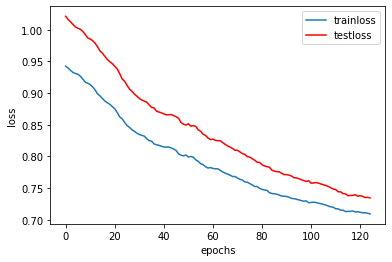

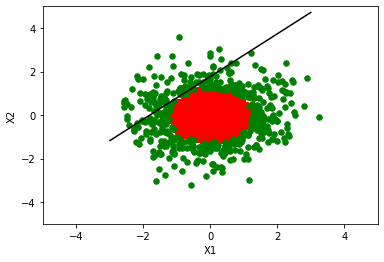

In [10]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



def loaddata(trainfilename, testfilename, n = 2):
    """
    加载数据集
    data: 原始数据集
    return: 特征数据x与标签类别数据y
    """
    dataSet = pd.read_table(trainfilename, header=None)
    testSet = pd.read_table(testfilename, header=None)
    if n == 1:  # 欠拟合
        dataSet.columns = ['X1', 'X2', 'label']
        testSet.columns = ['X1', 'X2', 'label']
    elif n == 2:
        dataSet.columns = ['X1', 'X2', 'X1^2', 'X2^2', 'label']
        testSet.columns = ['X1', 'X2', 'X1^2', 'X2^2', 'label']
    elif n == 3:
        dataSet.columns = ['X1', 'X2', 'X1^2','X2^2', 'X1^3', 'X1^4', 'label']
        testSet.columns = ['X1', 'X2', 'X1^2','X2^2', 'X1^3', 'X1^4', 'label']
    else :print("拟合参数选取错误")
    dataSet.insert(0, 'X0', 1)
    testSet.insert(0, 'X0', 1)
    columns = [i for i in dataSet.columns if i != 'label']
    columns_test = [i for i in testSet.columns if i != 'label']
    data_x = dataSet[columns]
    data_y = dataSet[['label']]
    test_x = testSet[columns_test]
    test_y = testSet[['label']]
    return data_x, data_y, test_x, test_y

def acc(theta, xMat, yMat): #计算正确率
    hypothesis = sigmoid(np.dot(xMat, theta))
    for i in range(len(hypothesis)):
        if hypothesis[i]>0.5:
            hypothesis[i] = 1
        elif hypothesis[i]<0.5:
            hypothesis[i] = 0
        hypothesis = abs(hypothesis-yMat)
        return (len(hypothesis)-np.sum(hypothesis))/len(hypothesis)

def plotBestFIt(theta, xMat, yMat):  #画拟合图像
    n = np.shape(xMat)[0]
    xcord1 = []
    ycord1 = []
    xcord2 = []
    ycord2 = []
    for i in range(n):
        if yMat[i] == 1:
            xcord1.append(xMat[i,1])
            ycord1.append(xMat[i,2])
        else:
            xcord2.append(xMat[i,1])
            ycord2.append(xMat[i,2])
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(xcord1, ycord1,s=30, c='red', marker='s')
    ax.scatter(xcord2, ycord2, s=30, c='green')
    x = np.arange(-3, 3, 0.001)
    
    #欠拟合图形
    
    y = -(-theta[0, 0] - theta[1, 0] * x) / theta[2, 0]  #matix
    ax.plot(x, y,color='k',linestyle='solid')
    
    
    #合理拟合图形
    '''
    a,b,c,d,e = theta[0,0],theta[1,0],theta[2,0],theta[3,0],theta[4,0]

    y = -(c + (c**2 - 4*d*e*x**2 - 4*b*e*x - 4*a*e)**(1/2))/(2*e)  #上半圆
    z =  -(c - (c**2 - 4*d*e*x**2 - 4*b*e*x - 4*a*e)**(1/2))/(2*e) #下半圆
    ax.plot(x, y,color='k',linestyle='solid')
    ax.plot(x, z,color='k',linestyle='solid')
    '''
    
    #过拟合图形
    '''
    a,b,c,d,e,f,g = theta[0,0],theta[1,0],theta[2,0],theta[3,0],theta[4,0],theta[5,0],theta[6,0]
    y = -(c + (c**2 - 4*e*g*x**4 - 4*e*f*x**3 - 4*d*e*x**2 - 4*b*e*x - 4*a*e)**(1/2))/(2*e)
    z = -(c - (c**2 - 4*e*g*x**4 - 4*e*f*x**3 - 4*d*e*x**2 - 4*b*e*x - 4*a*e)**(1/2))/(2*e)
    ax.plot(x, y,color='k',linestyle='solid')
    ax.plot(x, z,color='k',linestyle='solid')
    '''


    plt.axis([-5,5,-5,5])   # 限制显示范围
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()


#sigmoid函数
def sigmoid(y):
    s = 1.0/(1.0+np.exp(-y))
    return s

def cost(xMat,theta,yMat):
    """
    计算损失函数
    xMat: 特征数据-矩阵
    theta: 参数
    yMat: 标签数据-矩阵
    return: 损失函数
    """
    m, n = xMat.shape
    hypothesis = sigmoid(np.dot(xMat, theta))  # 预测值
    cost = (-1.0 / m) * np.sum(yMat.T * np.log(hypothesis) + (1 - yMat).T * np.log(1 - hypothesis))  # 损失函数
    return cost


def MBGD_LR(data_x, data_y, test_x, test_y, alpha=0.1,batch_size=10, maxepochs=10000,epsilon=1e-4):
    """
    使用MBGD求解逻辑回归
    data_x: 特征数据
    data_y: 标签数据
    aplha: 步长，该值越大梯度下降幅度越大
    maxepochs: 最大迭代次数
    epsilon: 损失精度
    return: 模型参数
    """
    xMat = np.mat(data_x)
    yMat = np.mat(data_y)
    test_xMat = np.mat(test_x)
    test_yMat = np.mat(test_y)
    m, n = xMat.shape
    theta = np.ones((n, 1))  # 模型参数
    epochs_count = 0
    loss_list = []
    test_loss_list = []
    epochs_list = []
    while epochs_count < maxepochs:
        randIndex = np.random.choice(range(len(xMat)), batch_size, replace=False)
        test_loss = cost(test_xMat,theta,test_yMat)
        loss = cost(xMat,theta,yMat) #前一次迭代的损失值
        hypothesis = sigmoid(np.dot(xMat[randIndex],theta)) #预测值
        error = hypothesis -yMat[randIndex] #预测值与实际值误差
        grad = (1.0/batch_size)*np.dot(xMat[randIndex].T,error) #损失函数的梯度
        theta = theta - alpha*grad #参数更新
        loss_new = cost(xMat,theta,yMat)#当前迭代的损失值
        if abs(loss_new-loss)<epsilon:
            break
        test_loss_list.append(test_loss)
        loss_list.append(loss_new)
        epochs_list.append(epochs_count)
        epochs_count += 1
    print(loss_new)
    print('迭代到第{}次，结束迭代！'.format(epochs_count))
    print('正确率为：%.2f%%' %(acc(theta, test_xMat, test_yMat)*100))
    plt.plot(epochs_list,loss_list,label='trainloss')
    plt.plot(epochs_list,test_loss_list,color='red', label='testloss')
    plt.legend(loc='upper right')
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.show()
    # 画出拟合情况
    plotBestFIt(theta,xMat,yMat)
    return theta


if __name__ == '__main__':# n=1欠拟合2合理拟合3过拟合
    data_x, data_y, test_x, test_y = loaddata('circle_trainunderfit.txt','circle_testunderfit.txt',1)
    #data_x, data_y, test_x, test_y = loaddata('circle_trainfit.txt','circle_testfit.txt',2)
    #data_x, data_y, test_x, test_y = loaddata('circle_trainoverfit.txt','circle_testoverfit.txt',3)
    theta_mbgd = MBGD_LR(data_x, data_y, test_x, test_y, alpha=0.05, batch_size=20, maxepochs=10000,epsilon=1e-5)


In [11]:
#合理拟合

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  del sys.path[0]
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  


0.16398495385565093
迭代到第1463次，结束迭代！
正确率为：86.81%


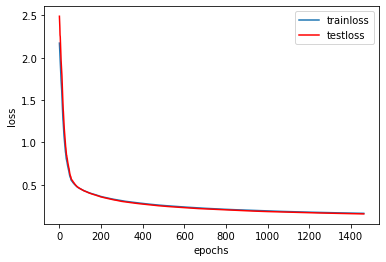

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:74: RuntimeWarning: invalid value encountered in sqrt
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:75: RuntimeWarning: invalid value encountered in sqrt


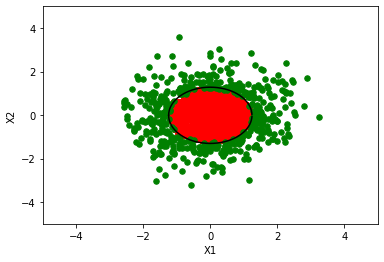

In [12]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



def loaddata(trainfilename, testfilename, n = 2):
    """
    加载数据集
    data: 原始数据集
    return: 特征数据x与标签类别数据y
    """
    dataSet = pd.read_table(trainfilename, header=None)
    testSet = pd.read_table(testfilename, header=None)
    if n == 1:  # 欠拟合
        dataSet.columns = ['X1', 'X2', 'label']
        testSet.columns = ['X1', 'X2', 'label']
    elif n == 2:
        dataSet.columns = ['X1', 'X2', 'X1^2', 'X2^2', 'label']
        testSet.columns = ['X1', 'X2', 'X1^2', 'X2^2', 'label']
    elif n == 3:
        dataSet.columns = ['X1', 'X2', 'X1^2','X2^2', 'X1^3', 'X1^4', 'label']
        testSet.columns = ['X1', 'X2', 'X1^2','X2^2', 'X1^3', 'X1^4', 'label']
    else :print("拟合参数选取错误")
    dataSet.insert(0, 'X0', 1)
    testSet.insert(0, 'X0', 1)
    columns = [i for i in dataSet.columns if i != 'label']
    columns_test = [i for i in testSet.columns if i != 'label']
    data_x = dataSet[columns]
    data_y = dataSet[['label']]
    test_x = testSet[columns_test]
    test_y = testSet[['label']]
    return data_x, data_y, test_x, test_y

def acc(theta, xMat, yMat): #计算正确率
    hypothesis = sigmoid(np.dot(xMat, theta))
    for i in range(len(hypothesis)):
        if hypothesis[i]>0.5:
            hypothesis[i] = 1
        elif hypothesis[i]<0.5:
            hypothesis[i] = 0
        hypothesis = abs(hypothesis-yMat)
        return (len(hypothesis)-np.sum(hypothesis))/len(hypothesis)

def plotBestFIt(theta, xMat, yMat):  #画拟合图像
    n = np.shape(xMat)[0]
    xcord1 = []
    ycord1 = []
    xcord2 = []
    ycord2 = []
    for i in range(n):
        if yMat[i] == 1:
            xcord1.append(xMat[i,1])
            ycord1.append(xMat[i,2])
        else:
            xcord2.append(xMat[i,1])
            ycord2.append(xMat[i,2])
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(xcord1, ycord1,s=30, c='red', marker='s')
    ax.scatter(xcord2, ycord2, s=30, c='green')
    x = np.arange(-3, 3, 0.001)
    
    #欠拟合图形
    '''
    y = -(-theta[0, 0] - theta[1, 0] * x) / theta[2, 0]  #matix
    ax.plot(x, y,color='k',linestyle='solid')
    '''
    
    #合理拟合图形
    
    a,b,c,d,e = theta[0,0],theta[1,0],theta[2,0],theta[3,0],theta[4,0]

    y = -(c + (c**2 - 4*d*e*x**2 - 4*b*e*x - 4*a*e)**(1/2))/(2*e)  #上半圆
    z =  -(c - (c**2 - 4*d*e*x**2 - 4*b*e*x - 4*a*e)**(1/2))/(2*e) #下半圆
    ax.plot(x, y,color='k',linestyle='solid')
    ax.plot(x, z,color='k',linestyle='solid')
    
    
    #过拟合图形
    '''
    a,b,c,d,e,f,g = theta[0,0],theta[1,0],theta[2,0],theta[3,0],theta[4,0],theta[5,0],theta[6,0]
    y = -(c + (c**2 - 4*e*g*x**4 - 4*e*f*x**3 - 4*d*e*x**2 - 4*b*e*x - 4*a*e)**(1/2))/(2*e)
    z = -(c - (c**2 - 4*e*g*x**4 - 4*e*f*x**3 - 4*d*e*x**2 - 4*b*e*x - 4*a*e)**(1/2))/(2*e)
    ax.plot(x, y,color='k',linestyle='solid')
    ax.plot(x, z,color='k',linestyle='solid')
    '''


    plt.axis([-5,5,-5,5])   # 限制显示范围
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()


#sigmoid函数
def sigmoid(y):
    s = 1.0/(1.0+np.exp(-y))
    return s

def cost(xMat,theta,yMat):
    """
    计算损失函数
    xMat: 特征数据-矩阵
    theta: 参数
    yMat: 标签数据-矩阵
    return: 损失函数
    """
    m, n = xMat.shape
    hypothesis = sigmoid(np.dot(xMat, theta))  # 预测值
    cost = (-1.0 / m) * np.sum(yMat.T * np.log(hypothesis) + (1 - yMat).T * np.log(1 - hypothesis))  # 损失函数
    return cost


def MBGD_LR(data_x, data_y, test_x, test_y, alpha=0.1,batch_size=10, maxepochs=10000,epsilon=1e-4):
    """
    使用MBGD求解逻辑回归
    data_x: 特征数据
    data_y: 标签数据
    aplha: 步长，该值越大梯度下降幅度越大
    maxepochs: 最大迭代次数
    epsilon: 损失精度
    return: 模型参数
    """
    xMat = np.mat(data_x)
    yMat = np.mat(data_y)
    test_xMat = np.mat(test_x)
    test_yMat = np.mat(test_y)
    m, n = xMat.shape
    theta = np.ones((n, 1))  # 模型参数
    epochs_count = 0
    loss_list = []
    test_loss_list = []
    epochs_list = []
    while epochs_count < maxepochs:
        randIndex = np.random.choice(range(len(xMat)), batch_size, replace=False)
        test_loss = cost(test_xMat,theta,test_yMat)
        loss = cost(xMat,theta,yMat) #前一次迭代的损失值
        hypothesis = sigmoid(np.dot(xMat[randIndex],theta)) #预测值
        error = hypothesis -yMat[randIndex] #预测值与实际值误差
        grad = (1.0/batch_size)*np.dot(xMat[randIndex].T,error) #损失函数的梯度
        theta = theta - alpha*grad #参数更新
        loss_new = cost(xMat,theta,yMat)#当前迭代的损失值
        if abs(loss_new-loss)<epsilon:
            break
        test_loss_list.append(test_loss)
        loss_list.append(loss_new)
        epochs_list.append(epochs_count)
        epochs_count += 1
    print(loss_new)
    print('迭代到第{}次，结束迭代！'.format(epochs_count))
    print('正确率为：%.2f%%' %(acc(theta, test_xMat, test_yMat)*100))
    plt.plot(epochs_list,loss_list,label='trainloss')
    plt.plot(epochs_list,test_loss_list,color='red', label='testloss')
    plt.legend(loc='upper right')
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.show()
    # 画出拟合情况
    plotBestFIt(theta,xMat,yMat)
    return theta


if __name__ == '__main__':# n=1欠拟合2合理拟合3过拟合
    #data_x, data_y, test_x, test_y = loaddata('circle_trainunderfit.txt','circle_testunderfit.txt',1)
    data_x, data_y, test_x, test_y = loaddata('circle_trainfit.txt','circle_testfit.txt',2)
    #data_x, data_y, test_x, test_y = loaddata('circle_trainoverfit.txt','circle_testoverfit.txt',3)
    theta_mbgd = MBGD_LR(data_x, data_y, test_x, test_y, alpha=0.05, batch_size=20, maxepochs=10000,epsilon=1e-5)


In [13]:
#最后过拟合

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  del sys.path[0]
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:111: RuntimeWarning: divide by zero encountered in log
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:144: RuntimeWarning: invalid value encountered in double_scalars


0.16253316205447324
迭代到第990次，结束迭代！
正确率为：87.11%


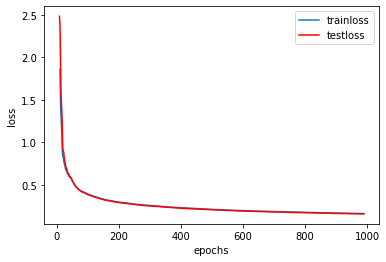

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:83: RuntimeWarning: invalid value encountered in sqrt
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:84: RuntimeWarning: invalid value encountered in sqrt


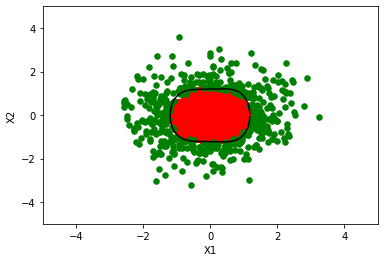

In [14]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



def loaddata(trainfilename, testfilename, n = 2):
    """
    加载数据集
    data: 原始数据集
    return: 特征数据x与标签类别数据y
    """
    dataSet = pd.read_table(trainfilename, header=None)
    testSet = pd.read_table(testfilename, header=None)
    if n == 1:  # 欠拟合
        dataSet.columns = ['X1', 'X2', 'label']
        testSet.columns = ['X1', 'X2', 'label']
    elif n == 2:
        dataSet.columns = ['X1', 'X2', 'X1^2', 'X2^2', 'label']
        testSet.columns = ['X1', 'X2', 'X1^2', 'X2^2', 'label']
    elif n == 3:
        dataSet.columns = ['X1', 'X2', 'X1^2','X2^2', 'X1^3', 'X1^4', 'label']
        testSet.columns = ['X1', 'X2', 'X1^2','X2^2', 'X1^3', 'X1^4', 'label']
    else :print("拟合参数选取错误")
    dataSet.insert(0, 'X0', 1)
    testSet.insert(0, 'X0', 1)
    columns = [i for i in dataSet.columns if i != 'label']
    columns_test = [i for i in testSet.columns if i != 'label']
    data_x = dataSet[columns]
    data_y = dataSet[['label']]
    test_x = testSet[columns_test]
    test_y = testSet[['label']]
    return data_x, data_y, test_x, test_y

def acc(theta, xMat, yMat): #计算正确率
    hypothesis = sigmoid(np.dot(xMat, theta))
    for i in range(len(hypothesis)):
        if hypothesis[i]>0.5:
            hypothesis[i] = 1
        elif hypothesis[i]<0.5:
            hypothesis[i] = 0
        hypothesis = abs(hypothesis-yMat)
        return (len(hypothesis)-np.sum(hypothesis))/len(hypothesis)

def plotBestFIt(theta, xMat, yMat):  #画拟合图像
    n = np.shape(xMat)[0]
    xcord1 = []
    ycord1 = []
    xcord2 = []
    ycord2 = []
    for i in range(n):
        if yMat[i] == 1:
            xcord1.append(xMat[i,1])
            ycord1.append(xMat[i,2])
        else:
            xcord2.append(xMat[i,1])
            ycord2.append(xMat[i,2])
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(xcord1, ycord1,s=30, c='red', marker='s')
    ax.scatter(xcord2, ycord2, s=30, c='green')
    x = np.arange(-3, 3, 0.001)
    
    #欠拟合图形
    '''
    y = -(-theta[0, 0] - theta[1, 0] * x) / theta[2, 0]  #matix
    ax.plot(x, y,color='k',linestyle='solid')
    '''
    
    #合理拟合图形
    '''
    a,b,c,d,e = theta[0,0],theta[1,0],theta[2,0],theta[3,0],theta[4,0]

    y = -(c + (c**2 - 4*d*e*x**2 - 4*b*e*x - 4*a*e)**(1/2))/(2*e)  #上半圆
    z =  -(c - (c**2 - 4*d*e*x**2 - 4*b*e*x - 4*a*e)**(1/2))/(2*e) #下半圆
    ax.plot(x, y,color='k',linestyle='solid')
    ax.plot(x, z,color='k',linestyle='solid')
    '''
    
    #过拟合图形
    
    a,b,c,d,e,f,g = theta[0,0],theta[1,0],theta[2,0],theta[3,0],theta[4,0],theta[5,0],theta[6,0]
    y = -(c + (c**2 - 4*e*g*x**4 - 4*e*f*x**3 - 4*d*e*x**2 - 4*b*e*x - 4*a*e)**(1/2))/(2*e)
    z = -(c - (c**2 - 4*e*g*x**4 - 4*e*f*x**3 - 4*d*e*x**2 - 4*b*e*x - 4*a*e)**(1/2))/(2*e)
    ax.plot(x, y,color='k',linestyle='solid')
    ax.plot(x, z,color='k',linestyle='solid')
    


    plt.axis([-5,5,-5,5])   # 限制显示范围
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()


#sigmoid函数
def sigmoid(y):
    s = 1.0/(1.0+np.exp(-y))
    return s

def cost(xMat,theta,yMat):
    """
    计算损失函数
    xMat: 特征数据-矩阵
    theta: 参数
    yMat: 标签数据-矩阵
    return: 损失函数
    """
    m, n = xMat.shape
    hypothesis = sigmoid(np.dot(xMat, theta))  # 预测值
    cost = (-1.0 / m) * np.sum(yMat.T * np.log(hypothesis) + (1 - yMat).T * np.log(1 - hypothesis))  # 损失函数
    return cost


def MBGD_LR(data_x, data_y, test_x, test_y, alpha=0.1,batch_size=10, maxepochs=10000,epsilon=1e-4):
    """
    使用MBGD求解逻辑回归
    data_x: 特征数据
    data_y: 标签数据
    aplha: 步长，该值越大梯度下降幅度越大
    maxepochs: 最大迭代次数
    epsilon: 损失精度
    return: 模型参数
    """
    xMat = np.mat(data_x)
    yMat = np.mat(data_y)
    test_xMat = np.mat(test_x)
    test_yMat = np.mat(test_y)
    m, n = xMat.shape
    theta = np.ones((n, 1))  # 模型参数
    epochs_count = 0
    loss_list = []
    test_loss_list = []
    epochs_list = []
    while epochs_count < maxepochs:
        randIndex = np.random.choice(range(len(xMat)), batch_size, replace=False)
        test_loss = cost(test_xMat,theta,test_yMat)
        loss = cost(xMat,theta,yMat) #前一次迭代的损失值
        hypothesis = sigmoid(np.dot(xMat[randIndex],theta)) #预测值
        error = hypothesis -yMat[randIndex] #预测值与实际值误差
        grad = (1.0/batch_size)*np.dot(xMat[randIndex].T,error) #损失函数的梯度
        theta = theta - alpha*grad #参数更新
        loss_new = cost(xMat,theta,yMat)#当前迭代的损失值
        if abs(loss_new-loss)<epsilon:
            break
        test_loss_list.append(test_loss)
        loss_list.append(loss_new)
        epochs_list.append(epochs_count)
        epochs_count += 1
    print(loss_new)
    print('迭代到第{}次，结束迭代！'.format(epochs_count))
    print('正确率为：%.2f%%' %(acc(theta, test_xMat, test_yMat)*100))
    plt.plot(epochs_list,loss_list,label='trainloss')
    plt.plot(epochs_list,test_loss_list,color='red', label='testloss')
    plt.legend(loc='upper right')
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.show()
    # 画出拟合情况
    plotBestFIt(theta,xMat,yMat)
    return theta


if __name__ == '__main__':# n=1欠拟合2合理拟合3过拟合
    #data_x, data_y, test_x, test_y = loaddata('circle_trainunderfit.txt','circle_testunderfit.txt',1)
    #data_x, data_y, test_x, test_y = loaddata('circle_trainfit.txt','circle_testfit.txt',2)
    data_x, data_y, test_x, test_y = loaddata('circle_trainoverfit.txt','circle_testoverfit.txt',3)
    theta_mbgd = MBGD_LR(data_x, data_y, test_x, test_y, alpha=0.05, batch_size=20, maxepochs=10000,epsilon=1e-5)
